# <span style='color:royalblue'>Project 2 - Ames Housing Data and Kaggle Challenge</span>




![tittle](images/Ames.jpeg)






## Part 2 : Modelling and Evaluations



<span style="color:gray">*This project has 2 parts:*
**Part 1:  Data Cleaning and EDA** can be found on a [*separate jupyter notebook*](part_1-data-cleaning-eda.ipynb)</span>


## Contents

1. [Import libraries and read data files](#1.-Import-all-libraries-and-read-in-.csv-data-files)
2. [Model Preparation & Pre-Processing](#2.-Model-Preparation-&-Pre-Processing)
3. [Building and Evaluating Models](#3.-Building-&-Evaluating-Models)
   - [Round 1](#Round-1:--Linear-Regression,-Lasso,-Ridge,-and-Elastic-Net)
     - [Linear Regression](#3.1.1-Linear-Regression)
     - [Lasso Regression](#3.1.2-LASSO-Regression)
     - [Ridge Regression](#3.1.3-RIDGE-Regression)
     - [ElasticNet](#3.1.4-ELASTICNET-Regression)
     - [Round 1 Modelling & Evaluation](#Round-1-:-Modelling-Results-&-Evaluation)
                
   - [Round 2](#Round-2:--Lasso-coefficients-analysis-&-feature-selection)
     - [Lasso Co-efficient Analysis](#Analysis-of-coefficients-from-Lasso-Model)
     - [Remodelling with selected features](#Round-2-Re-modelling-with-selected-features:)
     - [Fit models](#Fit-the-selected-model-to-the-total-train-dataset-(train-subset-+-validation))
4. [Kaggle Submission](#4.-Kaggle-Submissions:)
5. [Conclusions](#5.-Conclusions:)
     


---

## 1. Import all libraries and read in `.csv` data files





In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('seaborn-notebook')

# modeling imports

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, median_absolute_error
import statsmodels.api as sm




In [2]:
# read the csv files after cleaning, eda, and some feature selection

train = pd.read_csv('datasets/train_after_eda.csv')
test = pd.read_csv('datasets/test_after_eda.csv')

**Data are correct:**
- Correct shape for both train & test 
- No unnamed columns.

In [3]:
print(f'train : {train.shape}')
print(f'test : {test.shape}')

train : (2049, 162)
test : (879, 153)


In [4]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,109.0,544.0,153.0,318.0,255.0,138.0,2827.0,145.0,1942.0,1956.0
lot_area,13517.0,11492.0,7922.0,9802.0,14235.0,16492.0,3675.0,12160.0,15783.0,11606.0
lot_shape,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0
overall_qual,6.0,7.0,5.0,5.0,6.0,6.0,6.0,5.0,5.0,5.0
mas_vnr_area,289.0,132.0,0.0,0.0,0.0,0.0,82.0,180.0,0.0,192.0
...,...,...,...,...,...,...,...,...,...,...
sale_type_ConLI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sale_type_ConLw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sale_type_New,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
sale_type_Oth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,2658.0,2718.0,2414.0,1989.0,625.0,333.0,1327.0,858.0,95.0,1568.0
lot_area,9142.0,9662.0,17104.0,8520.0,9500.0,1890.0,8516.0,9286.0,3515.0,10125.0
lot_shape,3.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0
overall_qual,6.0,5.0,7.0,5.0,6.0,4.0,4.0,5.0,7.0,6.0
mas_vnr_area,0.0,0.0,0.0,0.0,247.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
sale_type_ConLI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sale_type_ConLw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sale_type_New,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sale_type_Oth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Define functions to evaluate models:**

In [6]:
# calculate adjusted R^2

def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [7]:
# evaluate models and record the metrics in a list for further evaluation:

import sklearn.metrics as metrics

model_evaluations = []

def evaluate_model(mod_name, train_val, y_true, y_pred, p):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    print('Model                   = ', mod_name,'-',train_val )    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)
    model_eval = {}
    model_eval['model'] = mod_name
    model_eval['dataset'] = train_val
    model_eval['mean_sq_error'] = mse
    model_eval['rt_mean_sq_error'] = rmse
    model_eval['mean_abs_error'] = mae
    model_eval['r2'] = r2
    model_eval['r2_adj'] = r2a
    model_evaluations.append(model_eval)



In [8]:
# function to summarize predictions

def summarize_predict(y, yhat, model, data):
    predict = {}
    predict['y'] = y
    predict['yhat'] = yhat
    predict['residuals'] = y - yhat
    predict['model'] = model
    predict['dataset'] = data
    return (predict)




**Define functions for dropping columns & rows:**

In [9]:
# create functions for dropping columns and rows to be used throughout the project
# for columns - using list of columns to help drop multiple columns at a time (as part of feature selection)
# for rows - dropping one at a time to be more careful in losing number observations

dropped_col_train =[]
dropped_col_test = []
dropped_row_train = []
dropped_row_test = []

def drop_col_train(df, list_columns_to_drop):
    """drop list of columns from train dataset"""
    print (f'train.shape before: {df.shape}\n')
    for col in list_columns_to_drop:        
        print (f'Dropped column : {col}')
        dropped_col_train.append(col)
        df.drop(columns = [col], inplace=True)
    print (f'\ntrain.shape after: {df.shape}\n')
    print ('\n')
        
def drop_col_test(df, list_columns_to_drop):
    """drop list of columns from test dataset"""
    print (f'test.shape before: {df.shape}\n')
    for col in list_columns_to_drop:        
        print (f'Dropped column : {col}')
        dropped_col_test.append(col)
        df.drop(columns = [col], inplace=True)
    print (f'\ntest.shape after: {df.shape}\n')
    print ('\n')

def drop_column(df, list_columns_to_drop):
    """drop list of columns from ANY dataset - no need to keep track"""
    print (f'shape before: {df.shape}\n')
    for col in list_columns_to_drop:        
        # print (f'Dropped column : {col}')
        df.drop(columns = [col], inplace=True)
    print (f'\nshape after: {df.shape}\n')
    print ('\n')

    
def drop_row_train(df, index_row_to_drop):
    """drop row (one at a time) from train dataset"""
    print (f'train.shape before: {df.shape}\n')    
    print (f'Dropped row : {index_row_to_drop}')
    dropped_row_train.append(index_row_to_drop)
    df.drop(df.index[index_row_to_drop], inplace=True)
    print (f'\ntrain.shape after: {df.shape}\n')
    print ('\n')
    
def drop_row_test(df, index_row_to_drop):
    """drop row (one at a time) from train dataset"""
    print (f'test.shape before: {df.shape}\n')    
    print (f'Dropped row : {index_row_to_drop}')
    dropped_row_test.append(index_row_to_drop)
    df.drop(df.index[index_row_to_drop], inplace=True)
    print (f'\ntest.shape after: {df.shape}\n')
    print ('\n')
    


**Define functions to plot visualizations:**

In [10]:
def plot_heatmap(title, corr, figsize = (12,12),cmap="RdBu_r"):
    fig = plt.figure(figsize=figsize)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corr, mask=mask, annot=True,cmap=cmap)
    ax.set_title(f'Correlation Heatmap: {title}')
    # plt.savefig('images/corr_heatmap_{title}.png');

In [11]:
def plot_heatmap_no_mask(title, corr, figsize = (12,12),cmap="RdBu_r"):
    fig = plt.figure(figsize=figsize)
    ax = sns.heatmap(corr, annot=True,cmap=cmap, vmin=-1,vmax=1)
    ax.set_title(f'Correlation Heatmap: {title}')
    # plt.savefig('images/corr_heatmap_{title}.png');



In [12]:
def jointplot_predictions(y, yhat, figsize = (6,4), legend=True, figtitle=None):
    fig = plt.figure(figsize=figsize)    
    fig.suptitle(figtitle, fontsize=14)
    ax = sns.jointplot(x=yhat, y=y, kind='reg')
    plt.title(figtitle,loc='left')
    plt.xlabel('y-saleprice')
    plt.ylabel('yhat-saleprice')
    # plt.savefig('images/jointplot{figtitle}.png');
    


In [13]:
def subplot_hist_percent(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, 
                       figsize=(10,8), bins = 15,ncols=2,nrows=0, sharex=True, sharey=True, figtitle=None):
    """plot histograms with subplots in matplotlib for percentages with 10% bins"""
    if nrows == 0:
        nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols, 
                           sharex=sharex, sharey=sharey) 
    fig.suptitle(figtitle, fontsize=16)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        bins = [0,10,20,30,40,50,60,70,80,90,100]
        ax[i].hist(dataframe[column],bins=bins, edgecolor='lightblue') 
        ax[i].set_title(list_of_titles[i])
        if (i >= (ncols*nrows)/2):
            ax[i].set_xlabel(list_of_xlabels[i])  
            ax[i].set_xticks([0,10,20,30,40,50,60,70,80,90,100])
            ax[i].set_xticklabels(['','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
        if (sharey==True) and (i % ncols == 0):
            ax[i].set_ylabel(list_of_ylabels[i])
            ax[i].set_yticks([2,4,6,8,10,12,14,16,18,20])
    plt.tight_layout()
    # plt.savefig(f'images/histogram_{figtitle}.png')

In [14]:
def plot_bar(title, df, x, y, ymin=None,ymax=None,figsize = (8,10), hue=None, 
             legend='best', hlines_y=None,xmax=None, hlines_label=None):
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data = df, y=y, x=x, hue=hue)
    ax.set_title(f'Barplot: {title}')
    if (ymin != None and ymax != None) :
        ax.set(ylim=(ymin, ymax))
    if legend != None:
        plt.legend(loc=legend)    
    if hlines_y != None:
        plt.hlines(y=hlines_y,
                   xmin = -1,
                   xmax = xmax,
                   color='firebrick',
                   linestyle = 'dashed',
                   label=hlines_label)
    plt.tight_layout
    # plt.savefig('images/bar{title}.png');

In [15]:
def plot_histograms(df, list_of_columns, ylabel=None, xlabel=None, bins=20,figsize=(6,4),
                    vlines_list=None,ymax=100):
    for i, col in enumerate(list_of_columns):
        fig = plt.figure(figsize=figsize)
        ax = plt.hist(df[col], bins=bins, edgecolor='cornflowerblue')
        plt.vlines(x=df[col].mean(),
           ymin = 0,
           ymax = ymax,
           color='firebrick',
           linestyle = 'solid',label='Mean')
        plt.vlines(x=df[col].median(),
           ymin = 0,
           ymax = ymax,
           color='salmon',
           linestyle = 'dashed',label='Median')
        plt.vlines(x=df[col].quantile(q=0.25),
           ymin = 0,
           ymax = ymax,
           color='lightsalmon',
           linestyle = 'dotted',label='25% Quantile')
        plt.vlines(x=df[col].quantile(q=0.75),
           ymin = 0,
           ymax = ymax,
           color='lightsalmon',
           linestyle = 'dotted',label='75% Quantile')
        if vlines_list != None:
            for num in vlines_list:
                plt.vlines(x=num,
                           ymin = 0, ymax = ymax, color='dimgrey',
                           linestyle = 'solid',label=f'{num}')
        plt.title(f'histogram: {col}',fontsize=18)
        plt.ylabel(ylabel, fontsize=10)
        plt.xlabel(xlabel, fontsize=10)
        plt.legend(fontsize=10);
        # plt.savefig('images/histograms.png');

## 2. Model Preparation & Pre-Processing

- **Train dataset:** will be used in the modelling process.
  - Perform `'train_test_split'` into `train` (subset) and `validation` 
  - Scale data using `'StandardScaler'`


- **Test dataset:** will only be used in Step 4 for generating predictions and submit to kaggle.


In [16]:
# assign features:

train_features = (col for col in train._get_numeric_data().columns if col != 'saleprice')


In [17]:
X = train[train_features]
y = train['saleprice']


In [18]:
# Train-Validation Split, using 25% default value for validation

X_train, X_validation, y_train, y_validation = train_test_split(X,y,random_state=42)  

In [19]:
# Scaling is needed as we have different units of measures (i.e. sqft, rooms, ordinal scales, etc)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_validation_scaled = ss.transform(X_validation)

## 3. Building & Evaluating Models


## <span style='color:teal'>Round 1:  Linear Regression, Lasso, Ridge, and Elastic Net</span>

### 3.1.1 Linear Regression

- The first model is linear regression, using all the 162 features.

*Note: Model evaluation & comparisons will be done after running ElasticNet.*


In [20]:
# instantiate the model

lr_1 = LinearRegression()

In [21]:
# fit model to data

lr_1.fit(X_train_scaled,y_train)

LinearRegression()

In [22]:
# Generate predictions

y_train_preds = lr_1.predict(X_train_scaled)
y_validation_preds = lr_1.predict(X_validation_scaled)

### Evaluate Model

In [23]:
# Training

R2_train = lr_1.score(X_train_scaled, y_train)
MSE_train = metrics.mean_squared_error(y_train, y_train_preds)
RMSE_train = np.sqrt(MSE_train)

In [24]:
# Cross-validation 

R2_CV5 = cross_val_score(lr_1, X_train_scaled, y_train, cv=5).mean()
MSE_CV5 = abs(cross_val_score(lr_1, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
RMSE_CV5 = np.sqrt(MSE_CV5)

In [25]:
# Prediction on Validation data

R2_validation = lr_1.score(X_validation_scaled, y_validation)
MSE_validation = metrics.mean_squared_error(y_validation, y_validation_preds)
RMSE_validation = np.sqrt(MSE_validation)

In [26]:
# Print Summary Scores

pd.set_option('display.float_format', lambda x: '%.5f' % x)

print(f'training: \nR2 = {R2_train}\nMSE = {MSE_train}\nRMSE = {RMSE_train}\n')
print(f'cross-validation: \nR2 = {R2_CV5}\nMSE = {MSE_CV5}\nRMSE = {RMSE_CV5}\n')
print(f'validation: \nR2 = {R2_validation}\nMSE = {MSE_validation}\nRMSE = {RMSE_validation}\n')

training: 
R2 = 0.9039888025851408
MSE = 576586451.1274039
RMSE = 24012.214623549487

cross-validation: 
R2 = -1.1607115878829397e+24
MSE = 7.595745915756341e+33
RMSE = 8.715357660908898e+16

validation: 
R2 = -1.4605485692490448e+17
MSE = 1.0368375472881922e+27
RMSE = 32199961914390.4



#### Key Metrics:  This will be summarized across different models

In [27]:
# metrics for y_train

evaluate_model('linear_1','train-subset', y_train, y_train_preds, X.shape[1])

Model                   =  linear_1 - train-subset
Mean squared error      =  576586451.1274039
Root mean squared error =  24012.214623549487
Median absolute error   =  11634.993427878551
R^2                     =  0.9039888025851408
Adjusted R^2            =  0.8927385822184797


In [28]:
# metrics for y_validation

evaluate_model('linear_1','validation', y_validation, y_validation_preds, X.shape[1])

Model                   =  linear_1 - validation
Mean squared error      =  1.0368375472881922e+27
Root mean squared error =  32199961914390.4
Median absolute error   =  15423.943368822802
R^2                     =  -1.4605485692490448e+17
Adjusted R^2            =  -2.1304868018675523e+17


### Evaluate the model - Linear Regression:

- <span style="color:'firebrick">**OVERFITTING**</span>
  - This model performs well on the train dataset with **fitted line**, and root mean square error of 24,012.22, and $Adjusted-R{^2}$ of 0.89.  -->  **Low Bias**
  - However, the model has a very high variance and does not generalise will wtih unseen data. --> **High Variance**
    - $Adjusted-R{^2}$ decreased significantly from 0.99 for the training dataset, to -2.1304868746228192e+17 when fitted to the validation dataset, and the $R{^2}$ for 5k cross validation -1.1607115878829397e+24. 
    - The root mean squared error on the validation dataset also increased significantly 1.0368375826957771e+27 !!!

- **Performance vs. baseline model:**
  - The baseline model assumes that we use the mean of y_train `'saleprice'` in the training set to predict the validations.  This will result in $R{^2}$ = 1.  Since our model has negative $R{^2}$, we can evaluate that this linear regression is performing worse than the baseline model, which is just using the mean to predict the `'saleprice'`.

- **NEXT STEPS:**
  - Explore regularizations in the next sections to correct overfitting.
  - We will not be using **polynomial features** in this case because the model is already **overfitting** but will focus more on **feature selection**.

<Figure size 288x288 with 0 Axes>

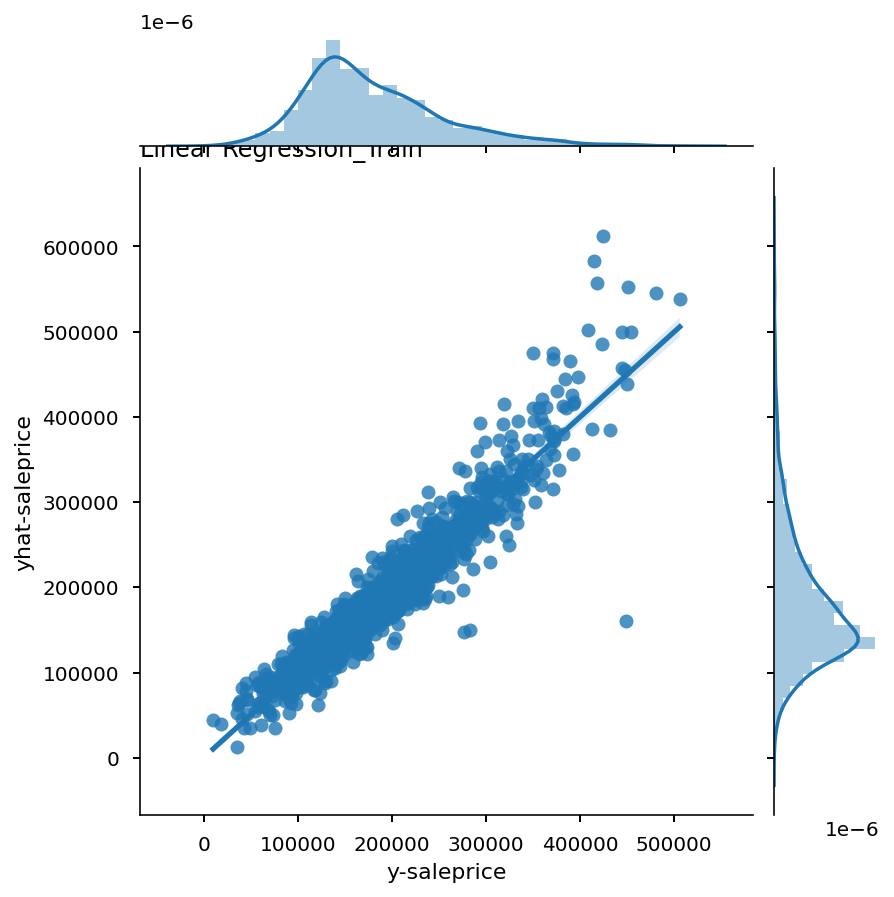

<Figure size 288x288 with 0 Axes>

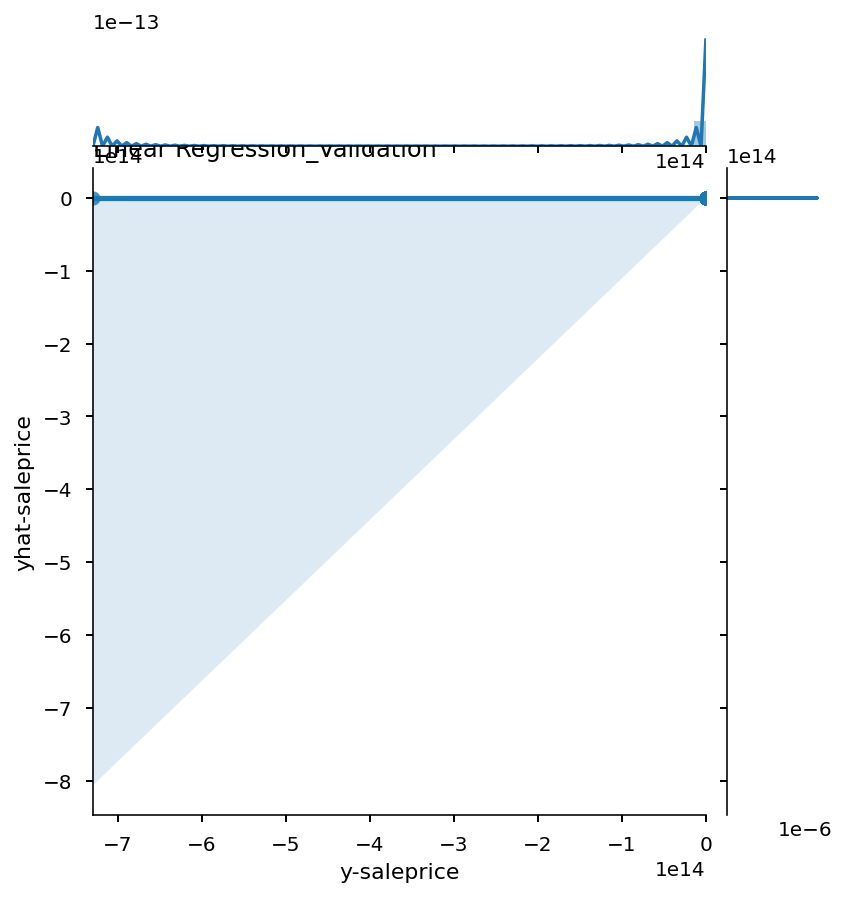

In [29]:

jointplot_predictions(y_train, y_train_preds, figsize = (4,4), 
                      legend=True, figtitle="Linear Regression_Train")

jointplot_predictions(y_validation, y_validation_preds, figsize = (4,4), 
                      legend=True, figtitle="Linear Regression_Validation")

### 3.1.2 LASSO Regression

- From the Linear Regression, the model was overfitting, and since we have high number of predictors, let's try Lasso for regularization to add penalty term, and help reduce the number of predictors as well.
- The Lasso improved the model significantly in terms of performance on unseen data.
  - $R{^2}$ of 0.85664 for 5k cross validation.
  - $Adjusted-R{^2}$ is closer between the train (0.84727) and validation (0.81405) datasets, giving closer predictions on unseen data. 
- The slight trade-off here is small increase in bias vs. Linear Regression.


*Note: model comparisons & analysis in the end after Elastic Net*


In [30]:
# Find optimal lasso alpha 

optimal_lasso = LassoCV(n_alphas=500, cv=5) #, verbose=1)    
optimal_lasso.fit(X_train_scaled, y_train)
print (optimal_lasso.alpha_)

589.8225974396063


In [31]:
# Cross validate Lasso scores with the optimal alpha 

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5)

print (lasso_scores)
print (np.mean(lasso_scores))



[0.90375964 0.89419522 0.86834805 0.8909903  0.72592168]
0.8566429778763833


In [32]:
lasso.fit(X_train, y_train)


Lasso(alpha=589.8225974396063)

In [33]:
lasso_y_preds_train = lasso.predict(X_train)


In [34]:
lasso_y_preds_validation = lasso.predict(X_validation)


In [35]:
evaluate_model('lasso_1','train-subset', y_train, lasso_y_preds_train, X.shape[1])


Model                   =  lasso_1 - train-subset
Mean squared error      =  821030001.5139595
Root mean squared error =  28653.621089034445
Median absolute error   =  13564.806964243602
R^2                     =  0.8632849013279
Adjusted R^2            =  0.8472651554136292


In [36]:
evaluate_model('lasso_1','validation', y_validation, lasso_y_preds_validation, X.shape[1])


Model                   =  lasso_1 - validation
Mean squared error      =  904960206.3381426
Root mean squared error =  30082.556512672632
Median absolute error   =  15153.59556903856
R^2                     =  0.8725221382991531
Adjusted R^2            =  0.814049386920702


### 3.1.3 RIDGE Regression

- Next, we'll explore Ridge for regularization.  
- Ridge also improved the model vs. Linear Regression in terms of performance on unseen data, however Lasso generated slightly better predictions on unseen data based on $Adjusted-R{^2}$ (all are >0.8 for both Ridge & Lasso for train and validation datasets.
- The root-mean-squared error is less than that of Lasso for both train (25,382) and validation (29,937).
- Similar to Lasso, the slight trade-off here is the increase in bias vs. Linear Regression.

*Note: model comparisons & analysis in the end after Elastic Net*


In [37]:
# Find optimal ridge alpha

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_scaled, y_train)

print (optimal_ridge.alpha_)

488.02515836544336


In [38]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[0.91039467 0.90011814 0.89074936 0.90168417 0.81702469 0.88016992
 0.91160237 0.87734247 0.65322461 0.86031519]
0.8602625593258972


In [39]:
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=488.02515836544336)

In [40]:
ridge_y_preds_train = ridge.predict(X_train_scaled)

In [41]:
ridge_y_preds_validation = ridge.predict(X_validation_scaled)

In [42]:
evaluate_model('ridge_1','train-subset', y_train, ridge_y_preds_train, X.shape[1])

Model                   =  ridge_1 - train-subset
Mean squared error      =  644253322.2934536
Root mean squared error =  25382.145738559095
Median absolute error   =  11085.608511866332
R^2                     =  0.8927211473822372
Adjusted R^2            =  0.880150626806211


In [43]:
evaluate_model('ridge_1', 'validation', y_validation, ridge_y_preds_validation, X.shape[1])

Model                   =  ridge_1 - validation
Mean squared error      =  896254862.6039386
Root mean squared error =  29937.51597250411
Median absolute error   =  14398.896065415058
R^2                     =  0.8737484227223077
Adjusted R^2            =  0.8158381550821125


### 3.1.4 ELASTICNET Regression

- The optimal values for l1-ratio (based on linspace) is 1, which is the same as Lasso, with the difference being the alpha 501.0169243613495  (vs. 589.8225974396063 from previous Lasso Modelling.
- Summary with comparisons of all models will be in the following section.


In [44]:

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10) #, verbose=1)   
optimal_enet.fit(X_train_scaled, y_train)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

501.0169243613495
1.0


In [45]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet.fit(X_train_scaled, y_train)
enet_scores = cross_val_score(enet, X_train, y_train, cv=5)

print (enet_scores)
print (np.mean(enet_scores))

[0.89500272 0.88818067 0.85833091 0.88095006 0.64617501]
0.8337278726635985


In [46]:
enet.score(X_train_scaled, y_train)

0.8958503962836211

In [47]:
enet.score(X_validation_scaled, y_validation)

0.8810774284984569

In [48]:
enet_y_preds_train = enet.predict(X_train_scaled)

In [49]:
enet_y_preds_validation = enet.predict(X_validation_scaled)

In [50]:
evaluate_model('enet_1','train-subset', y_train, enet_y_preds_train, X.shape[1])

Model                   =  enet_1 - train-subset
Mean squared error      =  625460904.6658815
Root mean squared error =  25009.21639447909
Median absolute error   =  11162.133538968134
R^2                     =  0.8958503962836211
Adjusted R^2            =  0.8836465489776989


In [51]:
evaluate_model('enet_1','validation',y_validation, enet_y_preds_validation, X.shape[1])

Model                   =  enet_1 - validation
Mean squared error      =  844226545.7578189
Root mean squared error =  29055.576844348125
Median absolute error   =  15035.79969569936
R^2                     =  0.8810774284984569
Adjusted R^2            =  0.8265288985504557


### Round 1 : Modelling Results & Evaluation



- <span style='color:darkblue'>**Linear Regression**</span> 
  - Although it has the best score on train-subset (RMSE 24,012, Adjusted R2 0.89), however significantly **overfitting**, hence does not generalise well on the validation data with huge RMSE and negative Adjusted R2.  Negative R2 also shows that the model performed worse than the baseline (using the mean of `saleprice` for predictions.
  - Plots below show a fitted line on the training dataset, while the plots in the validation dataset is out of range.



LINEAR REGRESSION


<Figure size 288x288 with 0 Axes>

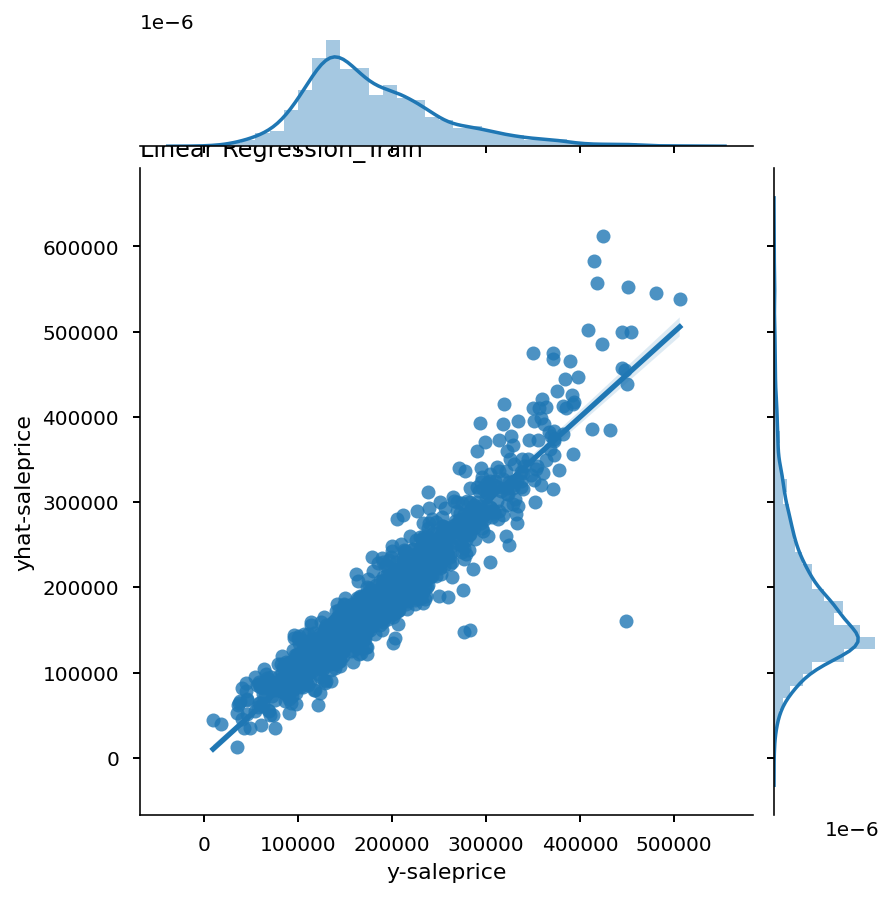

<Figure size 288x288 with 0 Axes>

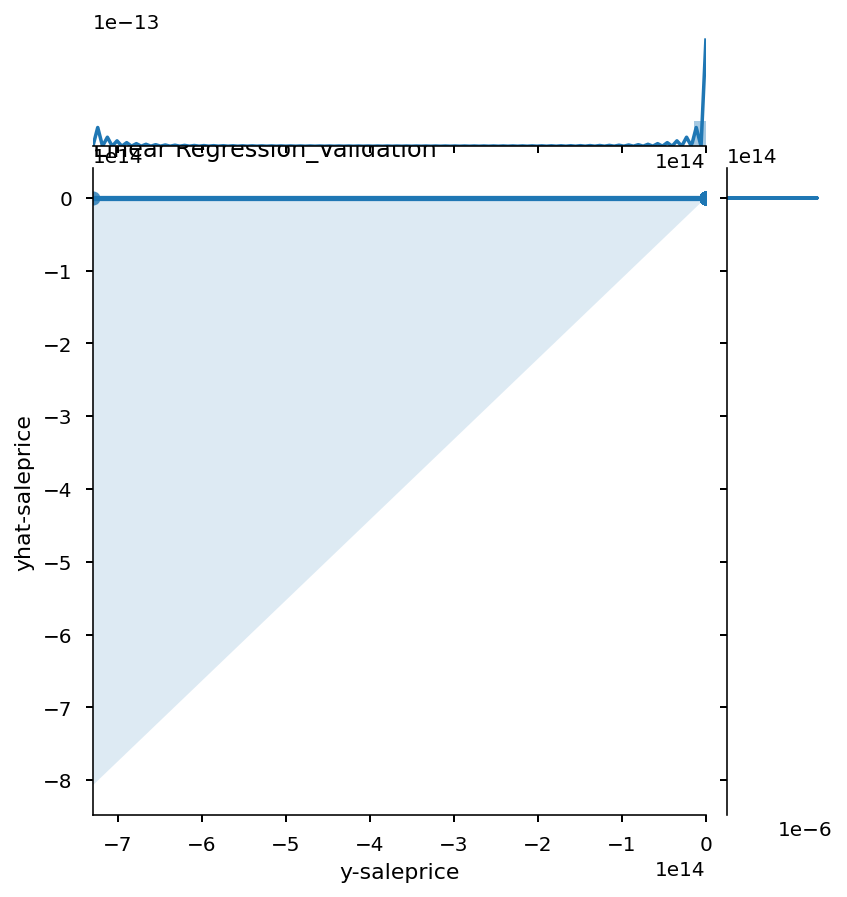

In [52]:
print('LINEAR REGRESSION')

jointplot_predictions(y_train, y_train_preds, figsize = (4,4), 
                      legend=True, figtitle="Linear Regression_Train")

jointplot_predictions(y_validation, y_validation_preds, figsize = (4,4), 
                      legend=True, figtitle="Linear Regression_Validation")


- <span style='color:darkblue'>**Lasso, Ridge, and ElasticNet**</span> 

  - All models performed similarly as seen in the plots below, with more consistent Adjusted R2 and RMSE between the train-subset and validation.  
  - Adjusted R2's are >0.8 meaning that the majority of the variances are explained by the model, and is better than the baseline of 0 (using the mean of the `saleprice` to predict).  
  - Root Mean Squared Error, measures the errors.  The Linear Regression has the lowest error on the train-subset (as it is overfitting), the other models generate errors between 25,009 - 30,083.  
  - Although Ridge and ElasticNet performed better on the train-subset:  less error (RMSE) and higher accuracy (R2), but overall **Lasso is better at generalising and hence performed better on unseen data** (less variation between the train-subset and validation on both the errors (RMSE 30,082-28,653 = 1429), and accuracy (R2 0.847-0.814)
  

LASSO


<Figure size 288x288 with 0 Axes>

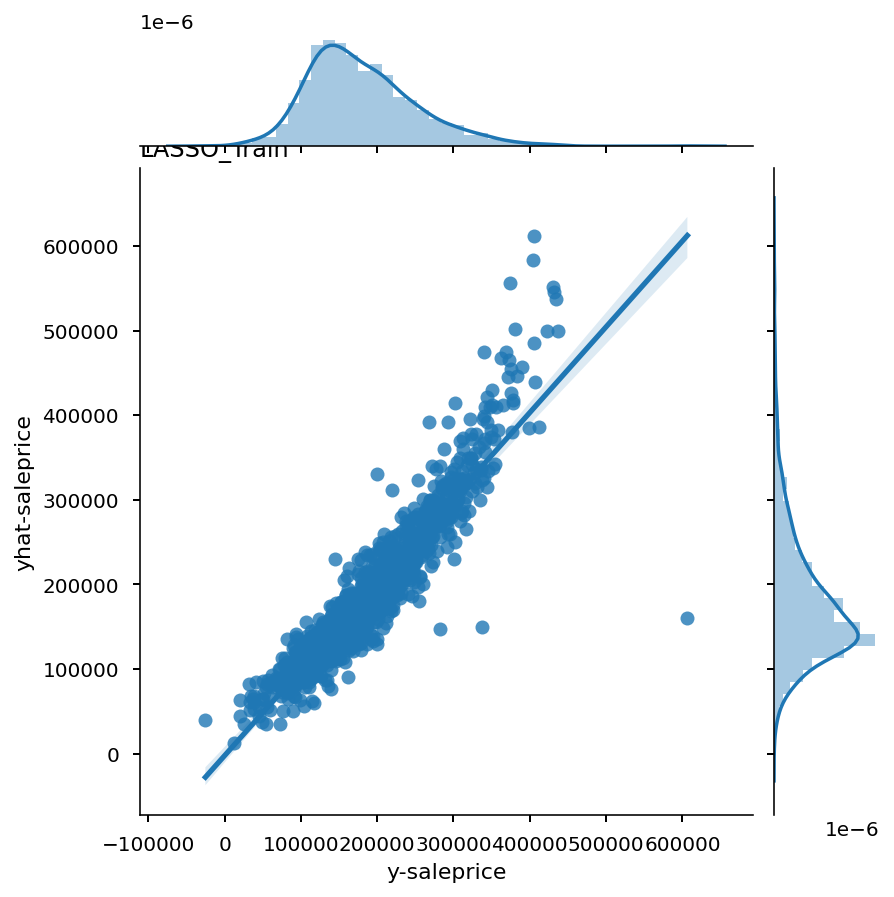

<Figure size 288x288 with 0 Axes>

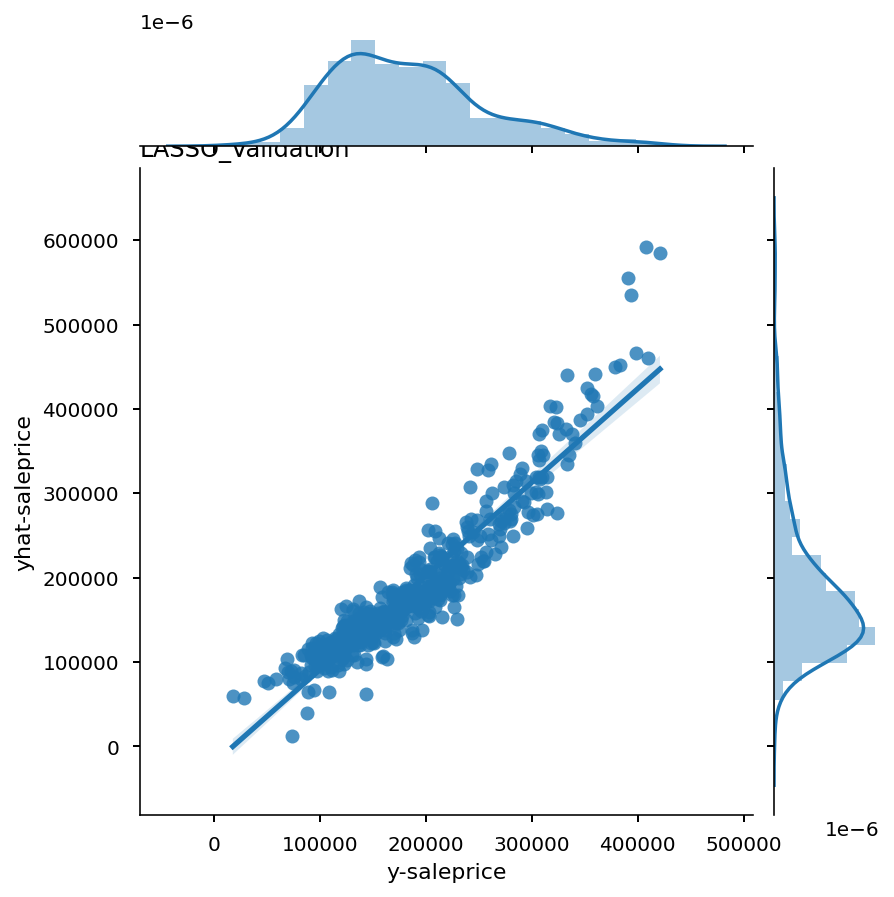

In [53]:
print('LASSO')

jointplot_predictions(y_train, lasso_y_preds_train, figsize = (4,4), 
                      legend=True, figtitle="LASSO_Train")

jointplot_predictions(y_validation, lasso_y_preds_validation, figsize = (4,4), 
                      legend=True, figtitle="LASSO_Validation")


RIDGE


<Figure size 288x288 with 0 Axes>

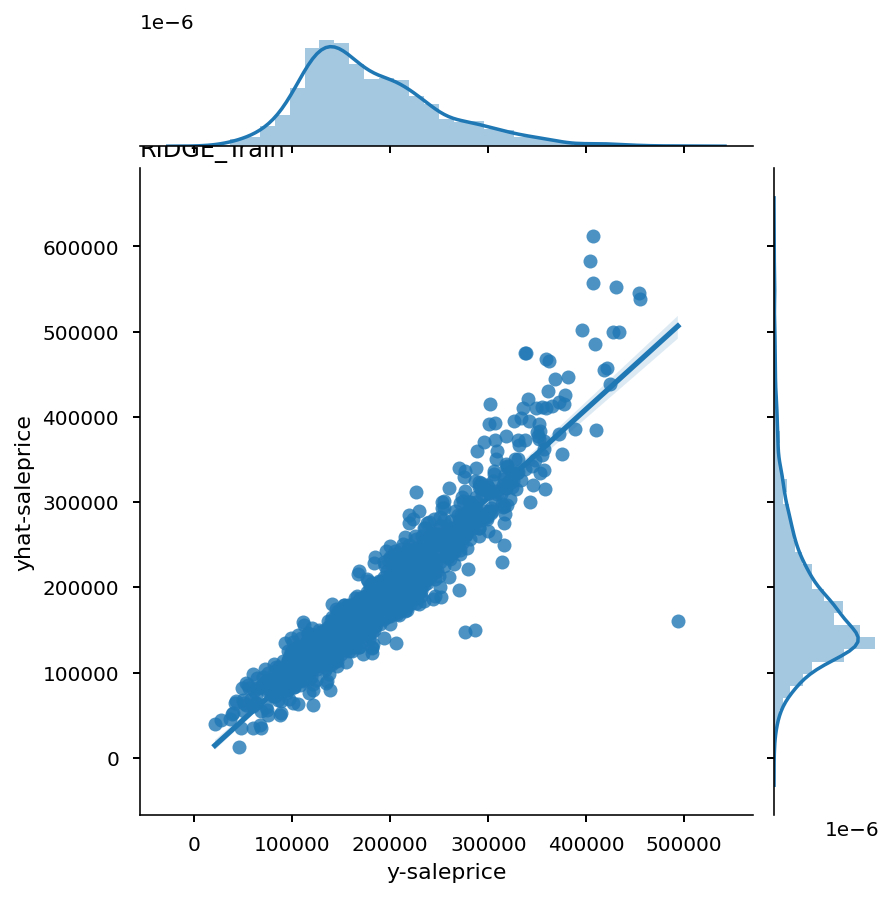

<Figure size 288x288 with 0 Axes>

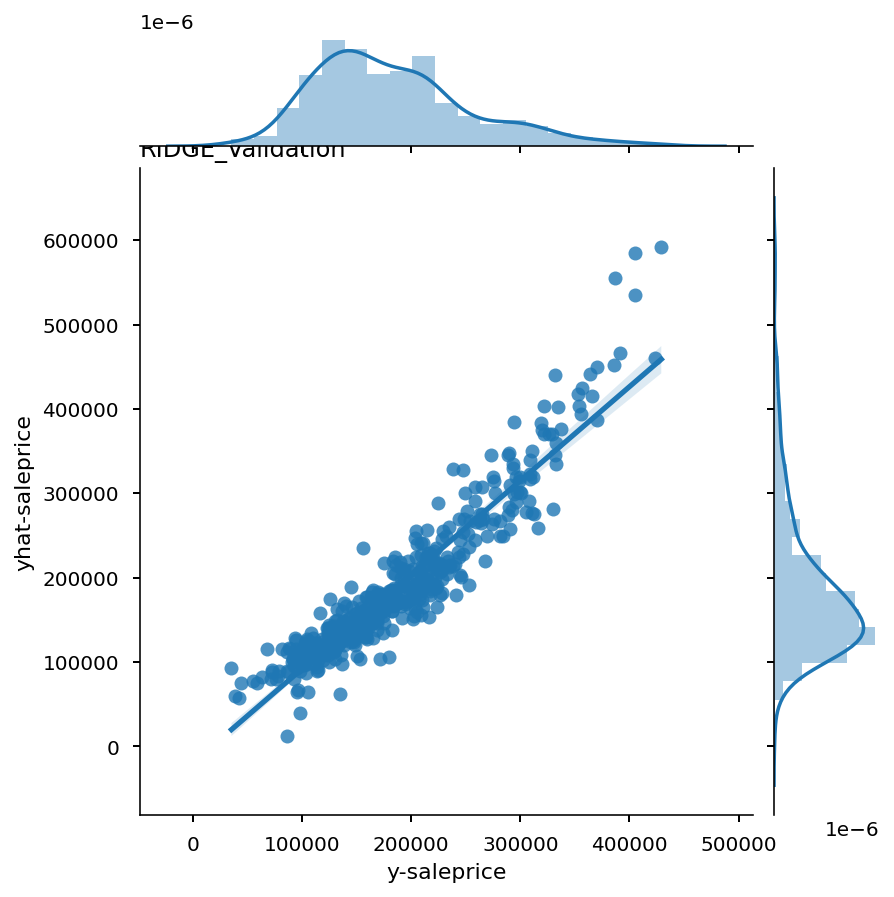

In [54]:
print('RIDGE')

jointplot_predictions(y_train, ridge_y_preds_train, figsize = (4,4), 
                      legend=True, figtitle="RIDGE_Train")

jointplot_predictions(y_validation, ridge_y_preds_validation, figsize = (4,4), 
                      legend=True, figtitle="RIDGE_Validation")


ELASTICNET


<Figure size 288x288 with 0 Axes>

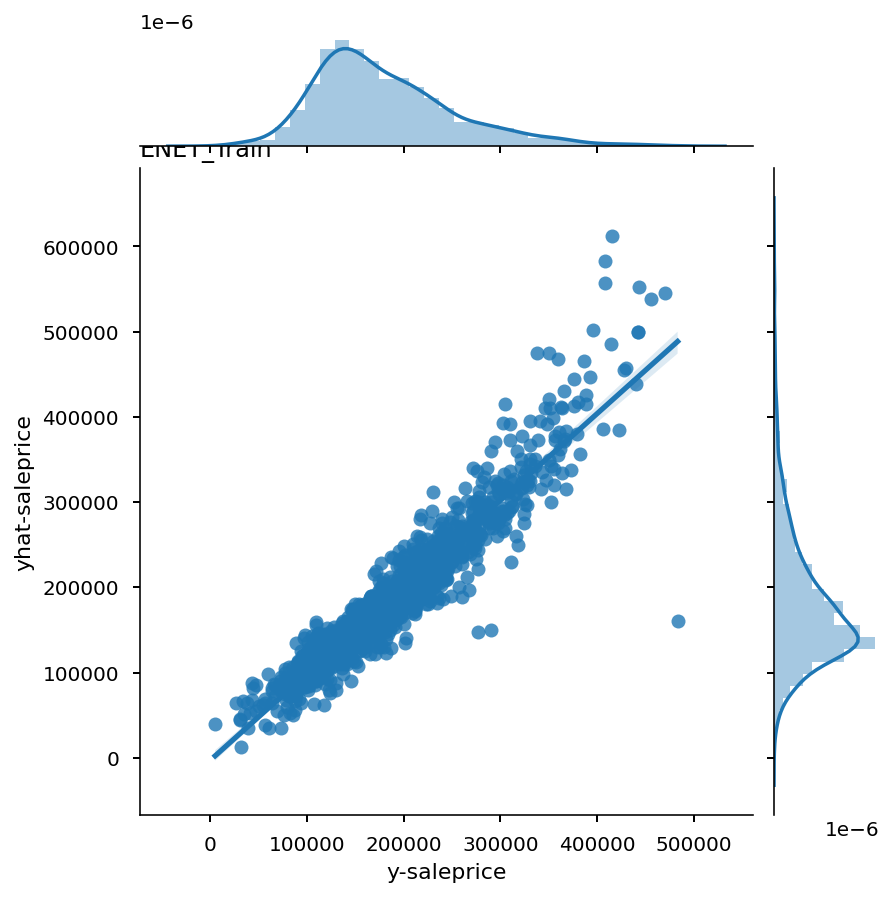

<Figure size 288x288 with 0 Axes>

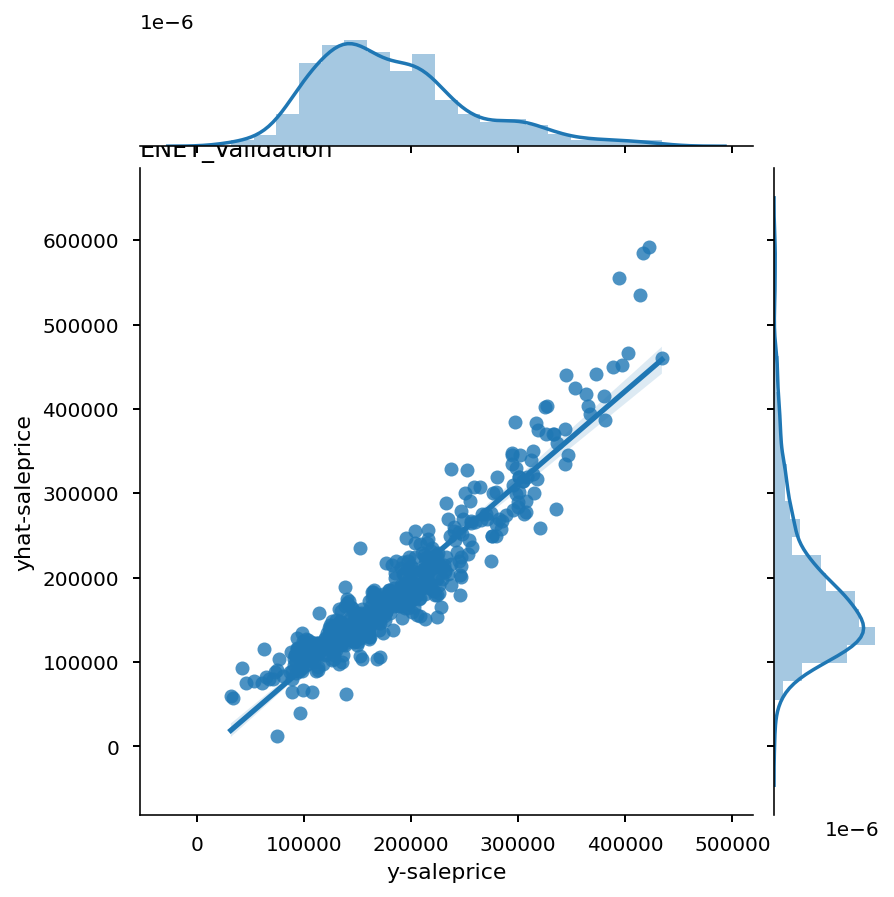

In [55]:
print('ELASTICNET')

jointplot_predictions(y_train, enet_y_preds_train, figsize = (4,4), 
                      legend=True, figtitle="ENET_Train")

jointplot_predictions(y_validation, enet_y_preds_validation, figsize = (4,4), 
                      legend=True, figtitle="ENET_Validation")


In [56]:
summary_model_evaluations = pd.DataFrame(model_evaluations)
round(summary_model_evaluations,5)

,model,dataset,mean_sq_error,rt_mean_sq_error,mean_abs_error,r2,r2_adj
0,linear_1,train-subset,576586451.12740,24012.21462,11634.99343,0.90399,0.89274
1,linear_1,validation,1036837547288192206378106880.00000,32199961914390.39844,15423.94337,-146054856924904480.00000,-213048680186755232.00000
2,lasso_1,train-subset,821030001.51396,28653.62109,13564.80696,0.86328,0.84727
3,lasso_1,validation,904960206.33814,30082.55651,15153.59557,0.87252,0.81405
4,ridge_1,train-subset,644253322.29345,25382.14574,11085.60851,0.89272,0.88015
5,ridge_1,validation,896254862.60394,29937.51597,14398.89607,0.87375,0.81584
6,enet_1,train-subset,625460904.66588,25009.21639,11162.13354,0.89585,0.88365
7,enet_1,validation,844226545.75782,29055.57684,15035.79970,0.88108,0.82653




- <span style='color:firebrick'>**Next Steps:**</span>
  - We will futher analyze the results from our Lasso model coefficients for **Round 2 Modelling** to further reduce features.



## <span style='color:teal'>Round 2:  Lasso coefficients analysis & feature selection</span>

From the selected Lasso model from round 1 (alpha=589.8225974396063), let's look at the coefficients

In [57]:
# Summarize all the lasso_coefficients into a Data Frame

lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head()


,variable,coef,abs_coef
77,neighborhood_NridgHt,16637.10057,16637.10057
3,overall_qual,10943.68507,10943.68507
83,neighborhood_StoneBr,9867.93726,9867.93726
5,exter_qual,9599.93785,9599.93785
16,kitchen_qual,9069.24781,9069.24781


### Analysis of coefficients from Lasso Model


**1. Features "zeroed out" = 126**

In [58]:
# There are 126 features that has been zeroed out from our initial Lasso model!!

lasso_coefs[(lasso_coefs.abs_coef == 0)]

,variable,coef,abs_coef
105,roof_style_Gable,-0.00000,0.00000
114,exterior_1st_CemntBd,0.00000,0.00000
122,exterior_1st_Wd Sdng,-0.00000,0.00000
121,exterior_1st_VinylSd,0.00000,0.00000
120,exterior_1st_Stucco,-0.00000,0.00000
...,...,...,...
63,neighborhood_CollgCr,-0.00000,0.00000
62,neighborhood_ClearCr,0.00000,0.00000
61,neighborhood_BrkSide,0.00000,0.00000
60,neighborhood_BrDale,-0.00000,0.00000


In [59]:
# save list of cols_to_drop 

cols_to_drop = lasso_coefs[(lasso_coefs.abs_coef == 0)]['variable'].values.tolist()

In [60]:
# drop the zero coefs from the lasso_coefs list

drop_index = lasso_coefs[(lasso_coefs.abs_coef == 0)].index
lasso_coefs.drop(index=drop_index, inplace=True)
lasso_coefs.shape

(35, 3)

**2. Remaining features = 34** 

- <span style='color:mediumblue'>**MODEL 1: All remaining 34 features**</span>
- Total of 35, but we will exclude 'id' from the modelling.  This is for identification only, and to keep consistent with test (which we will need 'id' for submission). 

In [61]:
lasso_coefs[~(lasso_coefs.abs_coef == 0)].count()

variable    35
coef        35
abs_coef    35
dtype: int64

In [62]:
lasso_coefs[~(lasso_coefs.abs_coef == 0)].head(2)

,variable,coef,abs_coef
77,neighborhood_NridgHt,16637.10057,16637.10057
3,overall_qual,10943.68507,10943.68507


In [63]:
lasso_coefs[~(lasso_coefs.abs_coef == 0)].tail(2)

,variable,coef,abs_coef
1,lot_area,0.52950,0.52950
0,id,-0.44416,0.44416


In [64]:
lasso_coefs.loc[~(lasso_coefs.abs_coef == 0)].sort_values('coef', ascending=False)

,variable,coef,abs_coef
77,neighborhood_NridgHt,16637.10057,16637.10057
3,overall_qual,10943.68507,10943.68507
83,neighborhood_StoneBr,9867.93726,9867.93726
5,exter_qual,9599.93785,9599.93785
16,kitchen_qual,9069.24781,9069.24781
35,ms_subclass_20,8929.19857,8929.19857
158,sale_type_New,8447.37885,8447.37885
52,land_contour_HLS,7199.61403,7199.61403
107,roof_style_Hip,6770.64804,6770.64804
8,bsmt_exposure,5716.47633,5716.47633


In [65]:
lasso_coefs.sort_values('coef',ascending=False,inplace=True)

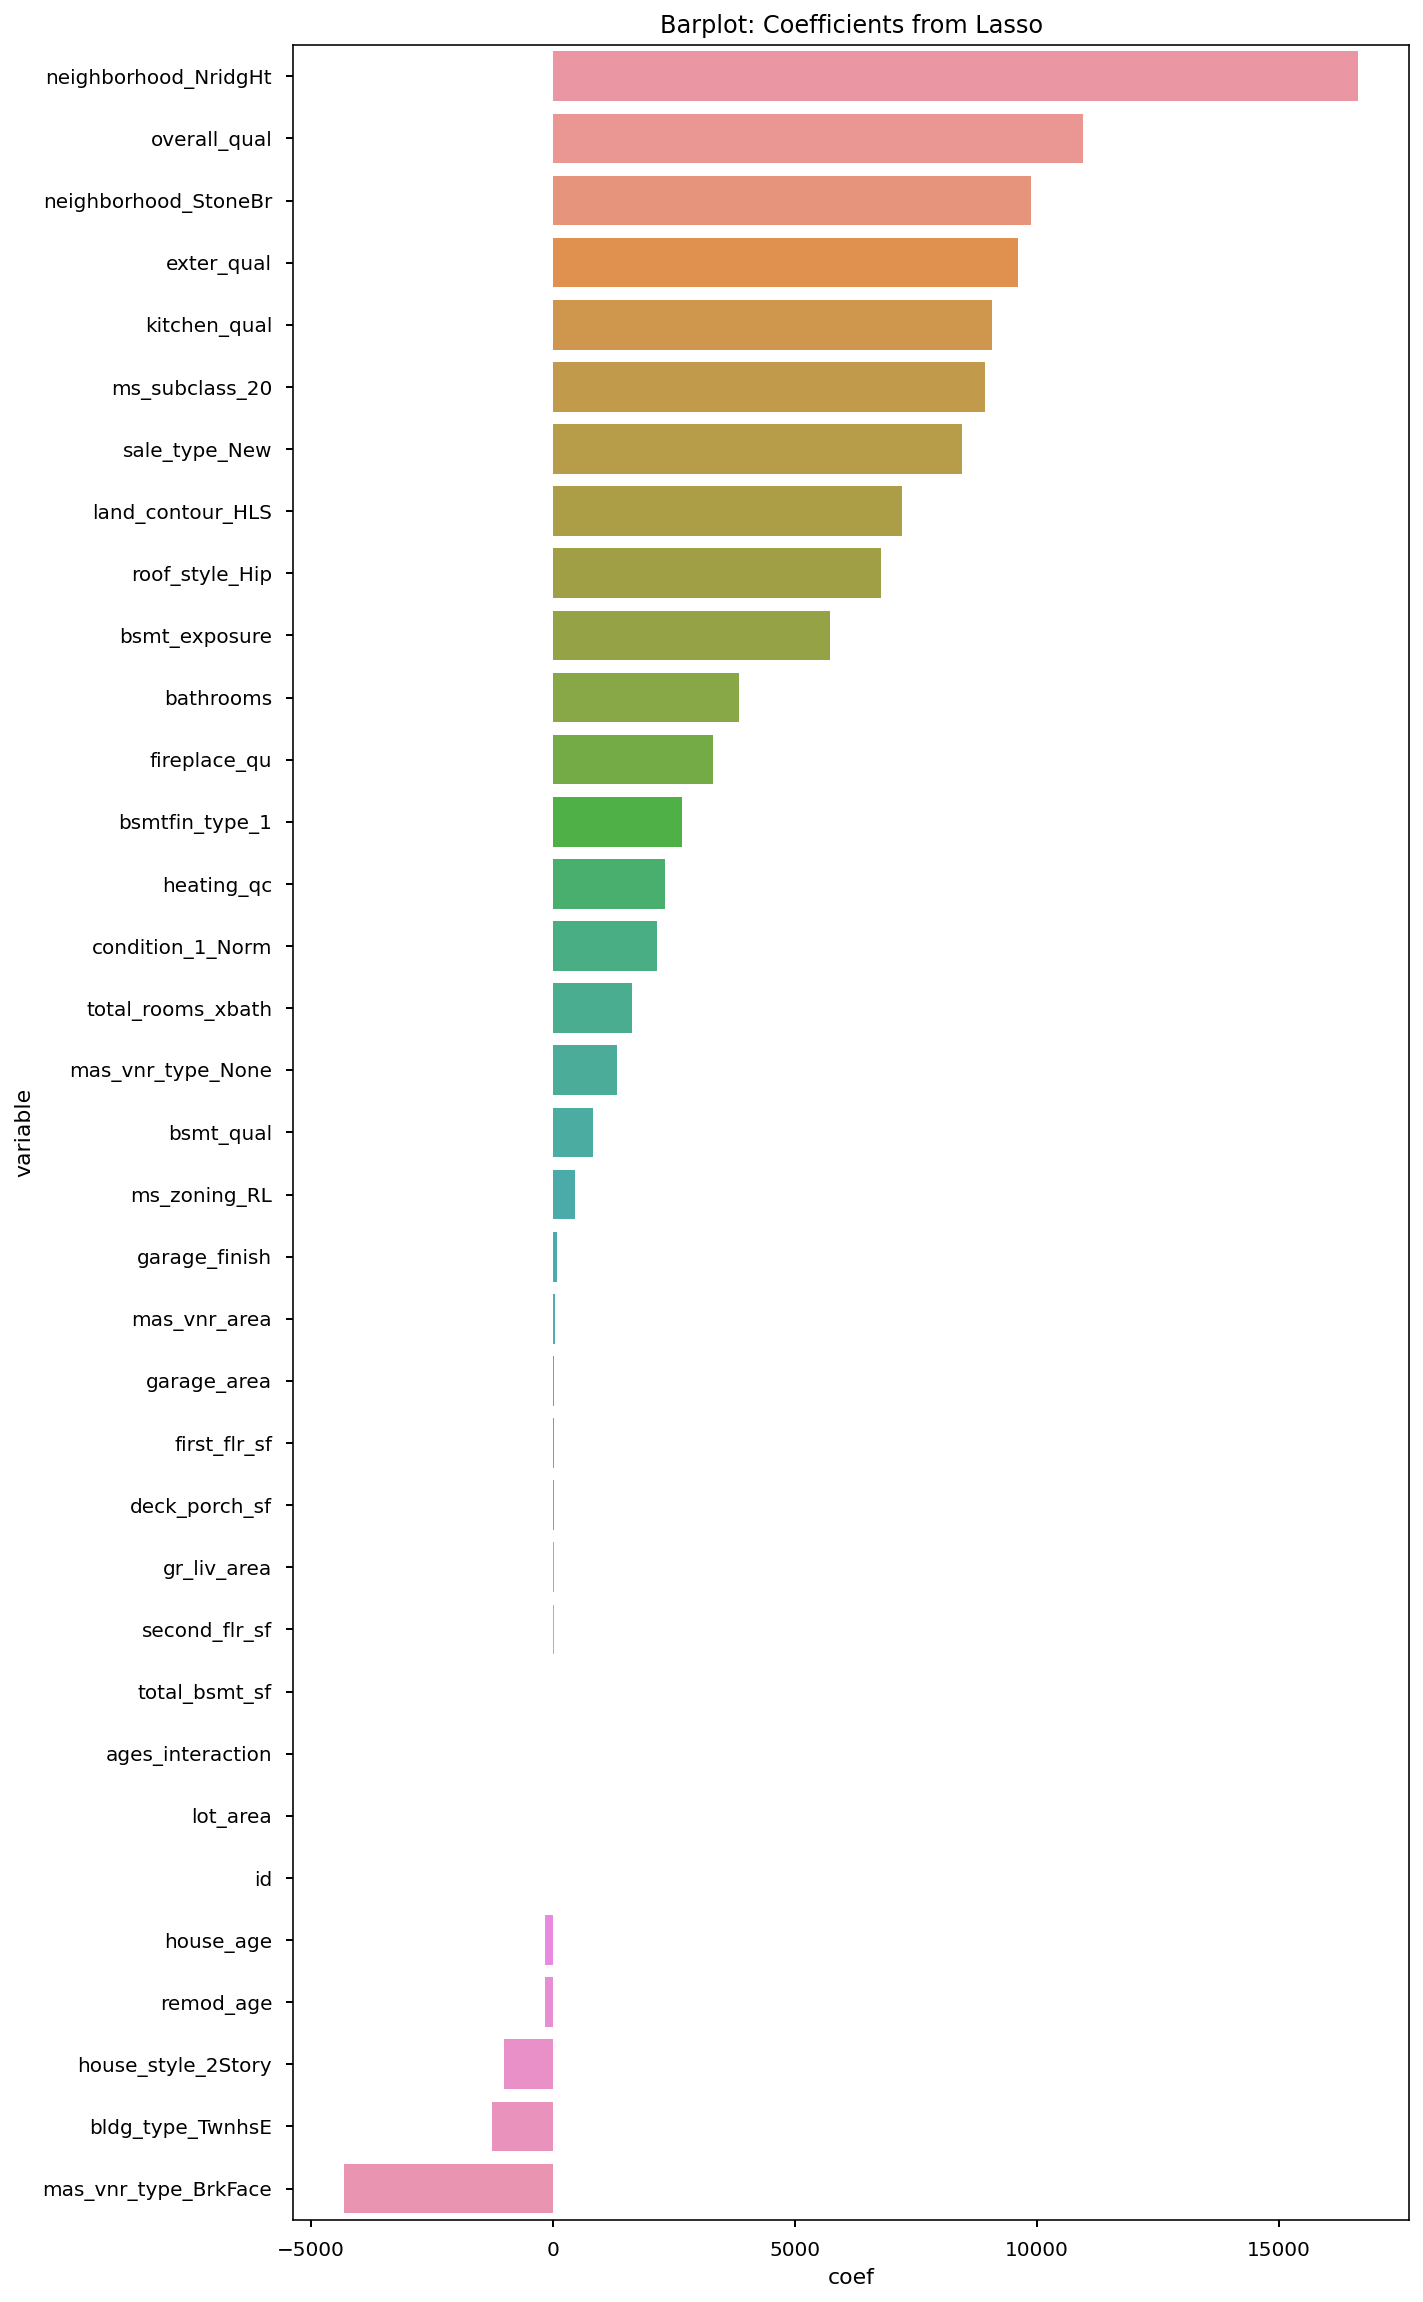

In [66]:
plot_bar('Coefficients from Lasso', lasso_coefs, x='coef', y='variable', figsize = (10,20), legend=None)



In [67]:
remod1_features = lasso_coefs[~(lasso_coefs.abs_coef == 0)]['variable'].values.tolist()
remod1_features.remove('id')
len(remod1_features)

34

**Analysis of the "non-zero" Lasso coefficients:**

- <span style='color:mediumblue'>**MODEL 2: There are 31 Features, dropping features with coefficient close to zero**</span>
- **Coefficient Bar Chart** showed 4 features with values almost zeroed-out.  We will drop these 4 features (includin 'id' that we've already dropped for Model 1).

In [68]:
remod2_features = remod1_features
remod2_features.remove('total_bsmt_sf')
remod2_features.remove('ages_interaction')
remod2_features.remove('lot_area')


In [69]:
len(remod2_features)

31

**Analysis of the "non-zero" Lasso coefficients:** *(Continued)*

- <span style='color:mediumblue'>**MODEL 3: There are 22 features with strong +/- correlation to `'saleprice'` and less collinearity with other features**</span>
- **Correlation Heatmap** of the 35 features from Lasso:
  - 12 features with low correlation (+/-0.3) to `'saleprice'` let's remove them.
  - `'ages_interaction'` that was created earlier to see if it can replace `'house_age'` and `'remod_age'`, but that doesn't seem to be the case.  We will remove `'ages_interaction'`.


In [70]:
cols_non_zero = lasso_coefs[~(lasso_coefs.abs_coef == 0)]['variable'].values.tolist()
cols_non_zero.append('saleprice')

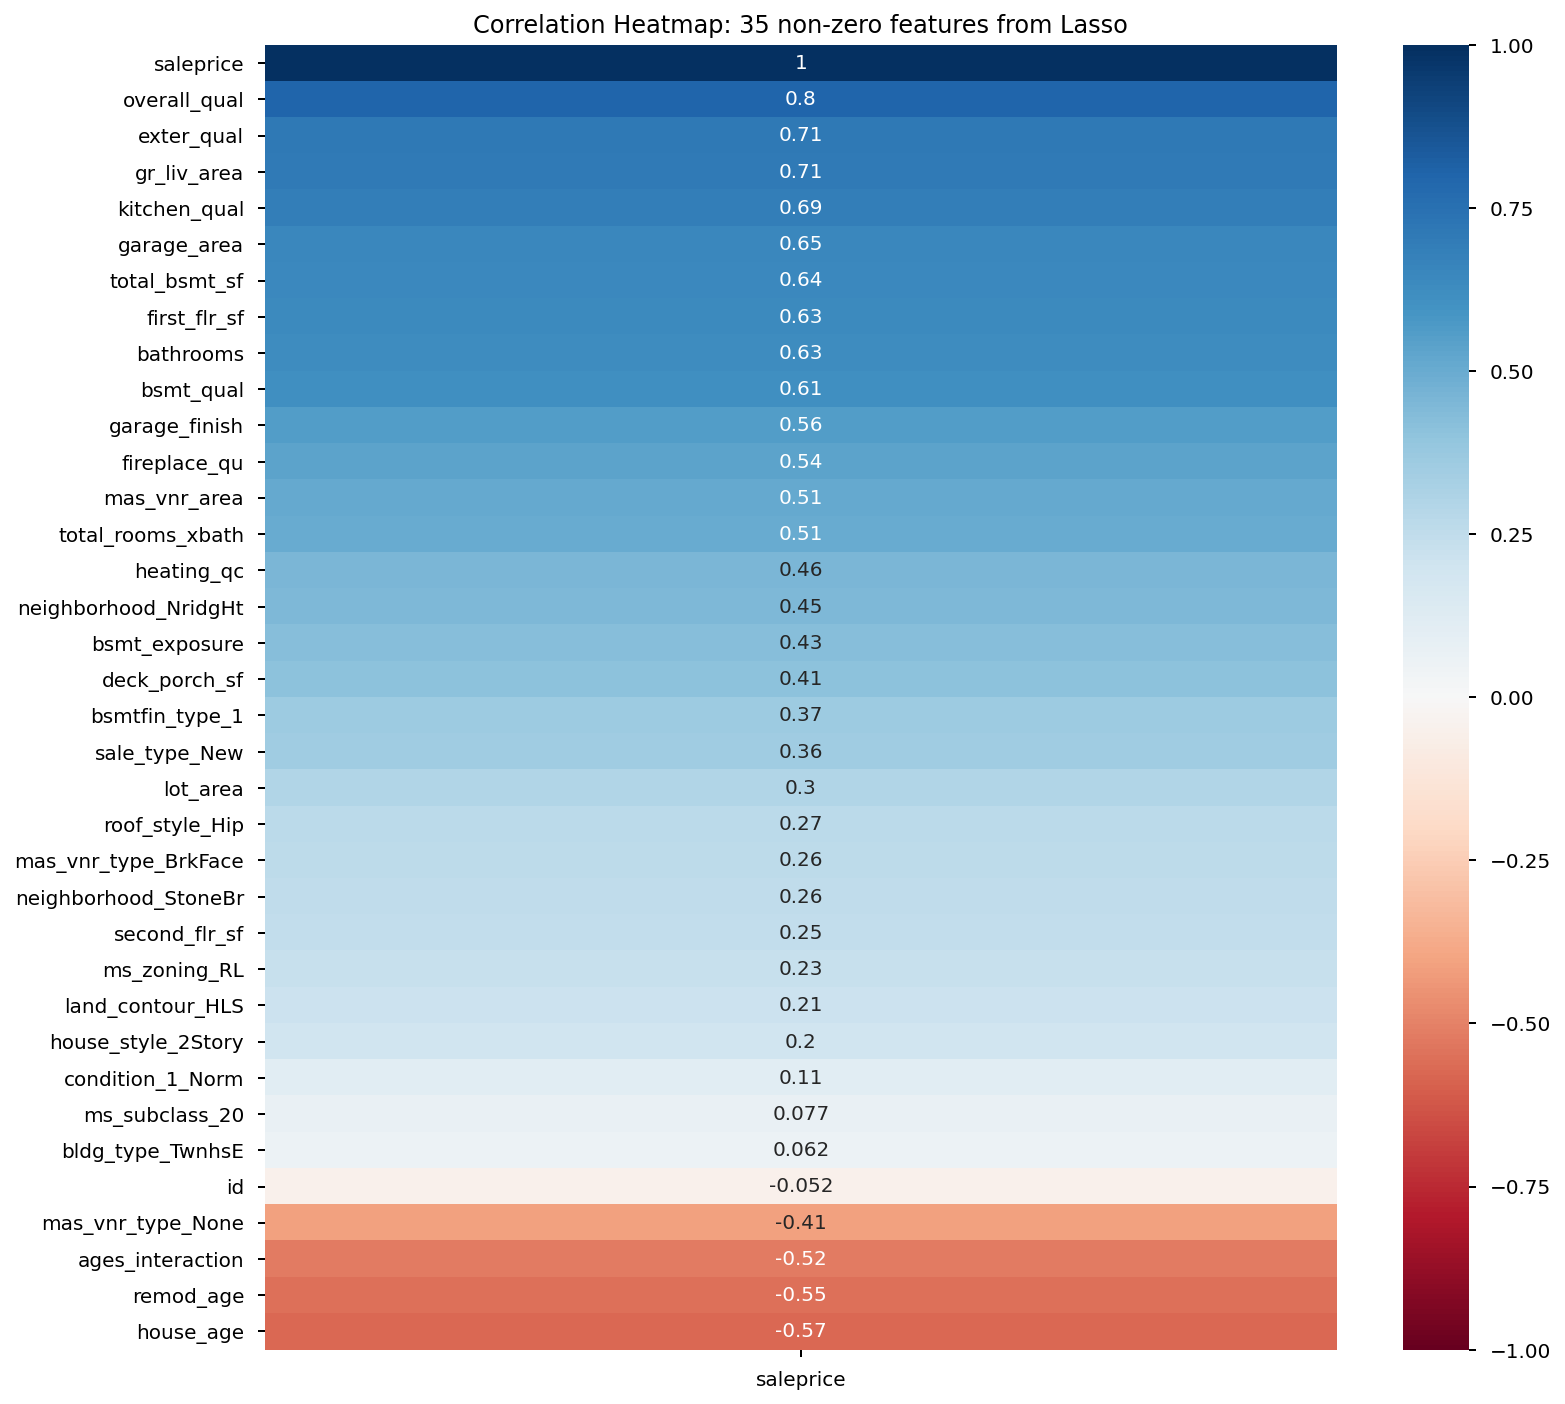

In [71]:
selected_corr = pd.DataFrame(train[cols_non_zero].corr()['saleprice'])
selected_corr.sort_values('saleprice',ascending=False, inplace=True)
plot_heatmap_no_mask('35 non-zero features from Lasso', selected_corr , cmap='RdBu')

In [72]:
# There are 12 features with low correlation to 'saleprice' (+/- 0.3)

selected_corr.loc[((selected_corr.saleprice < 0.3) & (selected_corr.saleprice > -0.3)),['saleprice']]

,saleprice
lot_area,0.29754
roof_style_Hip,0.26578
mas_vnr_type_BrkFace,0.25835
neighborhood_StoneBr,0.25711
second_flr_sf,0.24830
ms_zoning_RL,0.23129
land_contour_HLS,0.21240
house_style_2Story,0.20135
condition_1_Norm,0.11120
ms_subclass_20,0.07708


In [73]:
remod3_features = selected_corr.loc[~(((selected_corr.saleprice < 0.3) & (selected_corr.saleprice > -0.3))),
                                    ['saleprice']].index.tolist()

remod3_features.remove('saleprice')   # removing 'saleprice' that we've added to analyse correlation
remod3_features 

['overall_qual',
 'exter_qual',
 'gr_liv_area',
 'kitchen_qual',
 'garage_area',
 'total_bsmt_sf',
 'first_flr_sf',
 'bathrooms',
 'bsmt_qual',
 'garage_finish',
 'fireplace_qu',
 'mas_vnr_area',
 'total_rooms_xbath',
 'heating_qc',
 'neighborhood_NridgHt',
 'bsmt_exposure',
 'deck_porch_sf',
 'bsmtfin_type_1',
 'sale_type_New',
 'mas_vnr_type_None',
 'ages_interaction',
 'remod_age',
 'house_age']

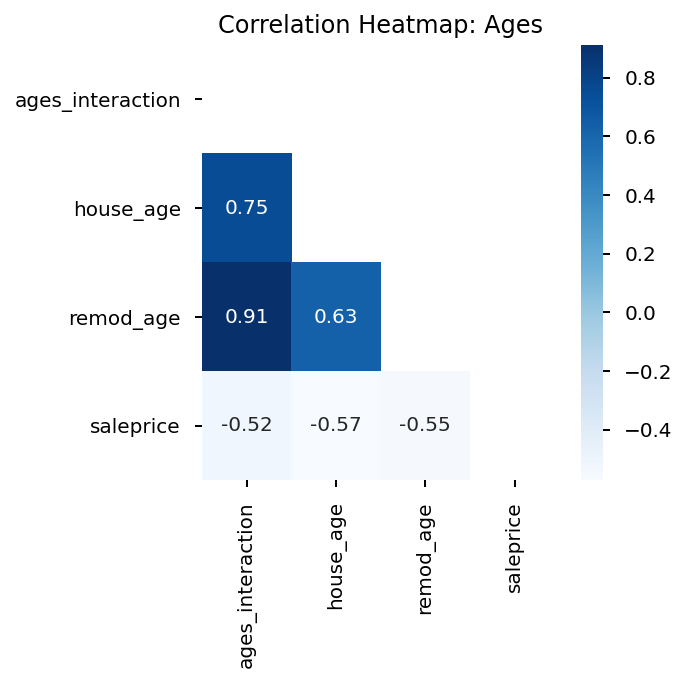

In [74]:
# 'ages interaction' that we've added during the EDA did not help reduce features after Lasso Regression
# we will drop 'ages interaction' because it has high correlation wtih 'remod_age' which we will keep

ages_corr = train[['ages_interaction', 'house_age','remod_age','saleprice']].corr()
plot_heatmap('Ages',ages_corr , figsize=(4,4),cmap='Blues')

In [75]:
# we have final of 22 features

remod3_features.remove('ages_interaction')   
len(remod3_features)

22

### Round 2 Re-modelling with selected features:

- <span style='color:mediumblue'>**RE-MODEL 1: All remaining 34 features with non-zero coefficients from LASSO**</span>

In [76]:
# Model 1: 
len(remod1_features)

31

In [77]:
# use the remod1_features to scale the train & validation data
ss1 = StandardScaler()
X1_train_scaled = ss1.fit_transform(X_train[remod1_features])
X1_validation_scaled = ss1.transform(X_validation[remod1_features])

mod1 = LinearRegression()
mod1.fit(X1_train_scaled, y_train)

LinearRegression()

In [78]:
# Generate predictions

y1_train_preds = mod1.predict(X1_train_scaled)
y1_validation_preds = mod1.predict(X1_validation_scaled)

In [79]:
R2_CV5 = cross_val_score(mod1, X1_train_scaled, y_train, cv=5).mean()
MSE_CV5 = abs(cross_val_score(mod1, X1_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
RMSE_CV5 = np.sqrt(MSE_CV5)

In [80]:
cross_val_score(mod1, X1_train_scaled, y_train, cv=5).mean()

0.8572132086500874

In [81]:
evaluate_model('Model 1','train-subset', y_train, y1_train_preds, len(remod1_features))

Model                   =  Model 1 - train-subset
Mean squared error      =  755849151.1689287
Root mean squared error =  27492.710873410222
Median absolute error   =  12817.739553614956
R^2                     =  0.8741385928739096
Adjusted R^2            =  0.8715443750408585


In [82]:
evaluate_model('Model 1','validation', y_validation, y1_validation_preds, len(remod1_features))

Model                   =  Model 1 - validation
Mean squared error      =  927492789.1262491
Root mean squared error =  30454.766279291147
Median absolute error   =  14416.800472519855
R^2                     =  0.8693480700337118
Adjusted R^2            =  0.8609276753789199


- <span style='color:mediumblue'>**RE-MODEL 2: With 26 Features that has absolute coefficient above 25% quantile**</span>

In [83]:
len(remod2_features)

31

In [84]:
# use the remod2_features to scale the train & validation data
ss2 = StandardScaler()
X2_train_scaled = ss2.fit_transform(X_train[remod2_features])
X2_validation_scaled = ss2.transform(X_validation[remod2_features])

mod2 = LinearRegression()
mod2.fit(X2_train_scaled, y_train)

# Generate predictions

y2_train_preds = mod2.predict(X2_train_scaled)
y2_validation_preds = mod2.predict(X2_validation_scaled)

In [85]:
R2_CV5 = cross_val_score(mod2, X2_train_scaled, y_train, cv=5).mean()
MSE_CV5 = abs(cross_val_score(mod2, X2_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
RMSE_CV5 = np.sqrt(MSE_CV5)

In [86]:
cross_val_score(mod2, X2_train_scaled, y_train, cv=5).mean()

0.8572132086500874

In [87]:
evaluate_model('Model 2','train-subset', y_train, y2_train_preds, len(remod2_features))

Model                   =  Model 2 - train-subset
Mean squared error      =  755849151.1689287
Root mean squared error =  27492.710873410222
Median absolute error   =  12817.739553614956
R^2                     =  0.8741385928739096
Adjusted R^2            =  0.8715443750408585


In [88]:
evaluate_model('Model 2','validation', y_validation, y2_validation_preds, len(remod2_features))

Model                   =  Model 2 - validation
Mean squared error      =  927492789.1262491
Root mean squared error =  30454.766279291147
Median absolute error   =  14416.800472519855
R^2                     =  0.8693480700337118
Adjusted R^2            =  0.8609276753789199


- <span style='color:mediumblue'>**RE-MODEL 3: There are 22 features with strong +/- correlation to `'saleprice'` and less collinearity with other features**</span>

In [89]:
len(remod3_features)

22

In [90]:
# use the remod2_features to scale the train & validation data
ss3 = StandardScaler()
X3_train_scaled = ss3.fit_transform(X_train[remod3_features])
X3_validation_scaled = ss3.transform(X_validation[remod3_features])

mod3 = LinearRegression()
mod3.fit(X3_train_scaled, y_train)

# Generate predictions

y3_train_preds = mod3.predict(X3_train_scaled)
y3_validation_preds = mod3.predict(X3_validation_scaled)

In [91]:
R2_CV5 = cross_val_score(mod3, X3_train_scaled, y_train, cv=5).mean()
MSE_CV5 = abs(cross_val_score(mod3, X3_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')).mean()
RMSE_CV5 = np.sqrt(MSE_CV5)

In [92]:
cross_val_score(mod3, X3_train_scaled, y_train, cv=5).mean()

0.8317273735728465

In [93]:
evaluate_model('Model 3','train-subset', y_train, y3_train_preds, len(remod3_features))

Model                   =  Model 3 - train-subset
Mean squared error      =  880618454.0836387
Root mean squared error =  29675.21615900445
Median absolute error   =  14755.081356845869
R^2                     =  0.8533624366703855
Adjusted R^2            =  0.8512302315195253


In [94]:
evaluate_model('Model 3','validation', y_validation, y3_validation_preds, len(remod3_features))

Model                   =  Model 3 - validation
Mean squared error      =  991900956.7543797
Root mean squared error =  31494.459143703036
Median absolute error   =  16545.54485397428
R^2                     =  0.8602751677913829
Adjusted R^2            =  0.8540018079779348


In [95]:
summary_model_evaluations = pd.DataFrame(model_evaluations)
round(summary_model_evaluations[['model','dataset','rt_mean_sq_error', 'r2', 'r2_adj']],5)

,model,dataset,rt_mean_sq_error,r2,r2_adj
0,linear_1,train-subset,24012.21462,0.90399,0.89274
1,linear_1,validation,32199961914390.39844,-146054856924904480.00000,-213048680186755232.00000
2,lasso_1,train-subset,28653.62109,0.86328,0.84727
3,lasso_1,validation,30082.55651,0.87252,0.81405
4,ridge_1,train-subset,25382.14574,0.89272,0.88015
5,ridge_1,validation,29937.51597,0.87375,0.81584
6,enet_1,train-subset,25009.21639,0.89585,0.88365
7,enet_1,validation,29055.57684,0.88108,0.82653
8,Model 1,train-subset,27492.71087,0.87414,0.87154
9,Model 1,validation,30454.76628,0.86935,0.86093


MODEL 1


<Figure size 288x288 with 0 Axes>

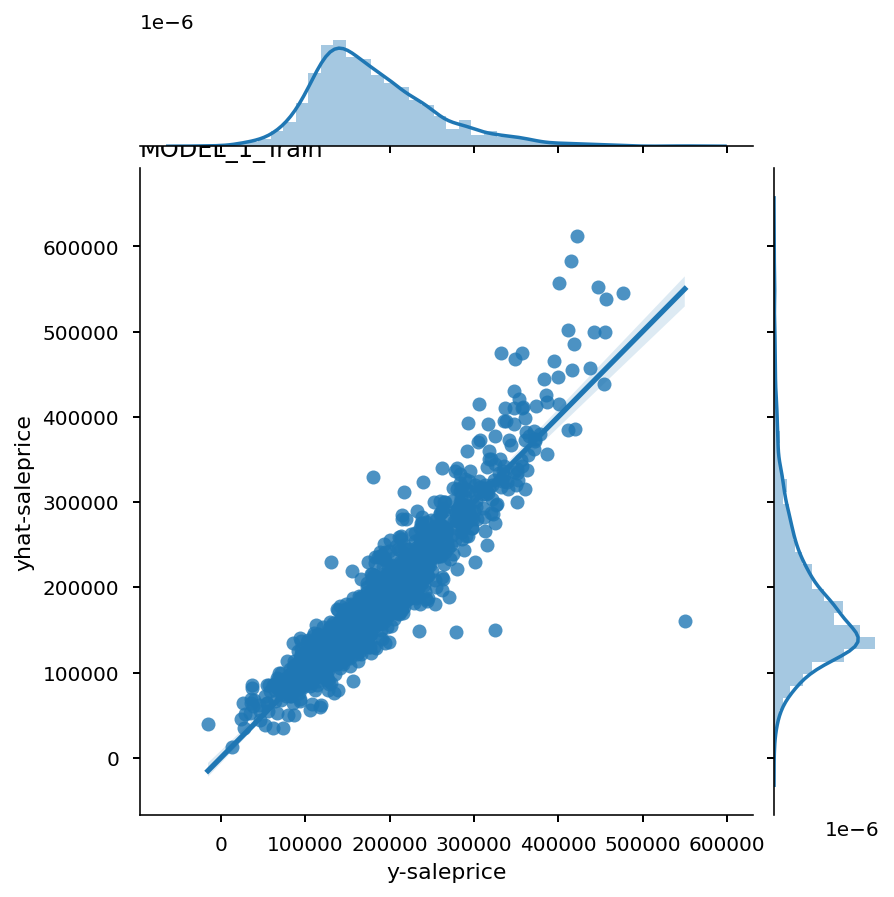

<Figure size 288x288 with 0 Axes>

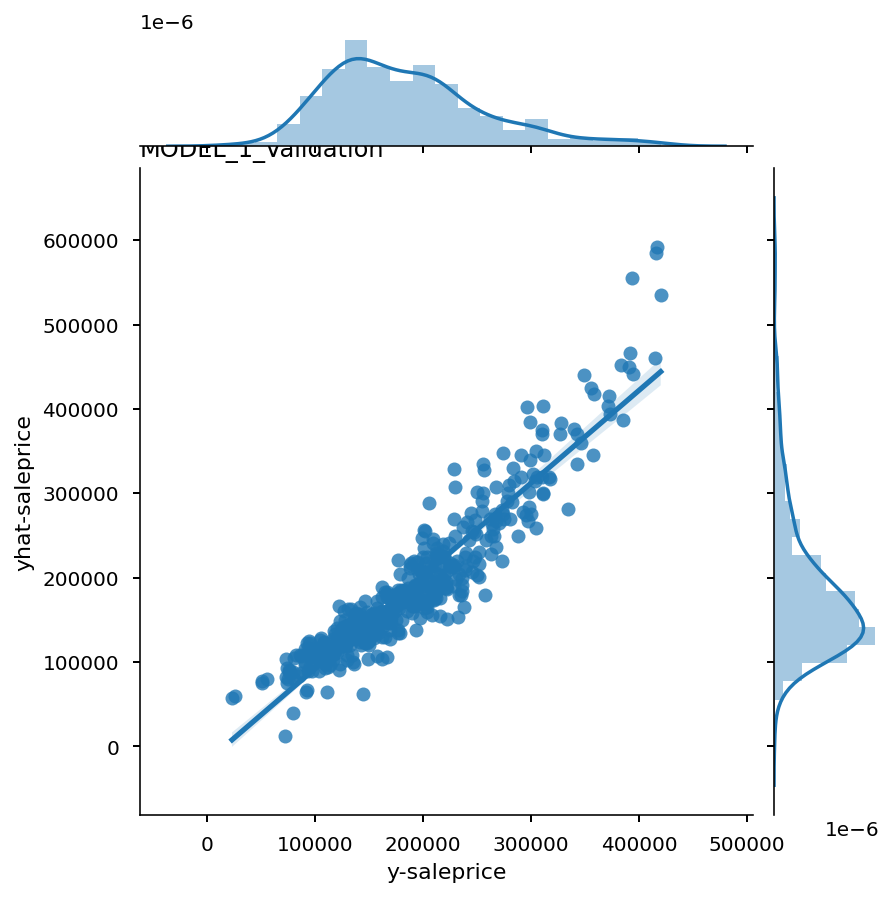

In [96]:
print('MODEL 1')

jointplot_predictions(y_train, y1_train_preds, figsize = (4,4), 
                      legend=True, figtitle="MODEL_1_Train")

jointplot_predictions(y_validation, y1_validation_preds, figsize = (4,4), 
                      legend=True, figtitle="MODEL_1_Validation")


In [97]:
# For plotting results, we will exclude Linear Regression as the data has extremely different value scales
summary_for_plot = summary_model_evaluations[(summary_model_evaluations['model'] != 'linear_1')]

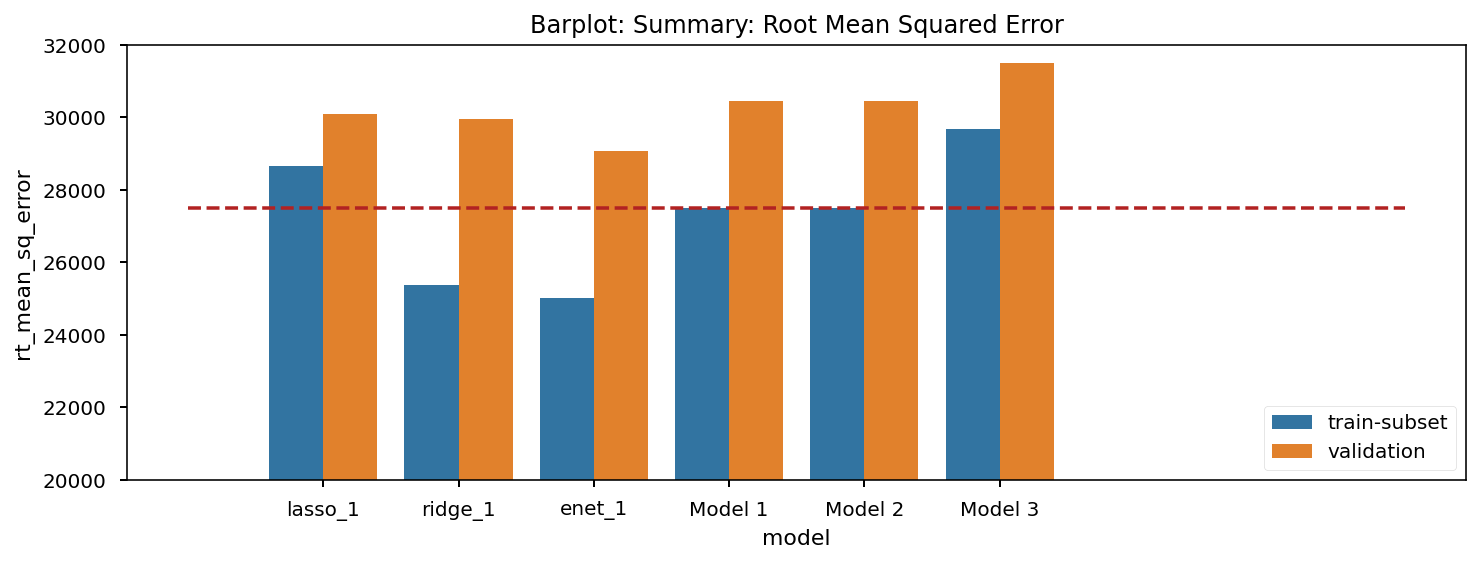

In [98]:
plot_bar('Summary: Root Mean Squared Error', summary_for_plot, 
         x='model', y='rt_mean_sq_error', figsize = (12,4), hue='dataset',
         legend='lower right',ymin=20000, ymax=32000, 
         hlines_y=(summary_for_plot.iloc[6,3]), xmax=8)

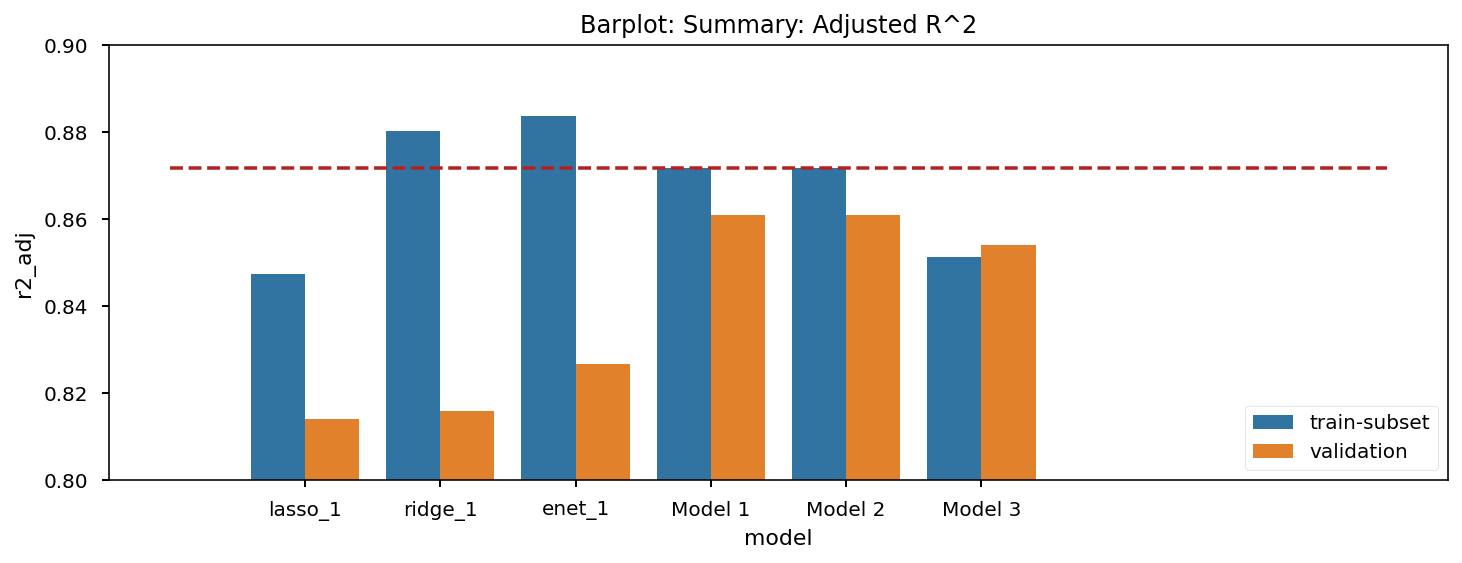

In [99]:
plot_bar('Summary: Adjusted R^2', summary_for_plot, 
         x='model', y='r2_adj', figsize = (12,4), hue='dataset',
         legend='lower right',ymin=0.8, ymax=0.9, 
         hlines_y=(summary_for_plot.iloc[6,6]), xmax=8)

**Choose Model 1:**
- LOWEST BIAS
  - Lowest RMSE = lowest error
  - Highest R2 of all = high accuracy
- LOWEST VARIANCE
  - Perform consistently on unseen data with mimimal difference of scores in training vs. validation data.
  

### Fit the selected model to the total train dataset (train-subset + validation)

In [100]:
# fit final features on to the total train dataset (train-subset + validation)

Xf_train = train[remod1_features]
yf_train = train['saleprice']

ss_final = StandardScaler()
Xf_train_scaled = ss_final.fit_transform(Xf_train)

mod_final = LinearRegression()
mod_final.fit(Xf_train_scaled, yf_train)

yf_train_preds = mod_final.predict(Xf_train_scaled)



In [101]:
evaluate_model('Final','Train (total)', yf_train, yf_train_preds, len(remod1_features))



Model                   =  Final - Train (total)
Mean squared error      =  786096854.4741038
Root mean squared error =  28037.418826883903
Median absolute error   =  13622.028294545496
R^2                     =  0.8748647541583312
Adjusted R^2            =  0.8729415054617066


In [102]:
summary_model_evaluations = pd.DataFrame(model_evaluations)
round(summary_model_evaluations[['model','dataset','rt_mean_sq_error', 'r2', 'r2_adj']],5)



,model,dataset,rt_mean_sq_error,r2,r2_adj
0,linear_1,train-subset,24012.21462,0.90399,0.89274
1,linear_1,validation,32199961914390.39844,-146054856924904480.00000,-213048680186755232.00000
2,lasso_1,train-subset,28653.62109,0.86328,0.84727
3,lasso_1,validation,30082.55651,0.87252,0.81405
4,ridge_1,train-subset,25382.14574,0.89272,0.88015
5,ridge_1,validation,29937.51597,0.87375,0.81584
6,enet_1,train-subset,25009.21639,0.89585,0.88365
7,enet_1,validation,29055.57684,0.88108,0.82653
8,Model 1,train-subset,27492.71087,0.87414,0.87154
9,Model 1,validation,30454.76628,0.86935,0.86093


In [103]:
# For plotting results, we will exclude Linear Regression as the data has extremely different value scales
summary_for_plot = summary_model_evaluations[(summary_model_evaluations['model'] != 'linear_1')]

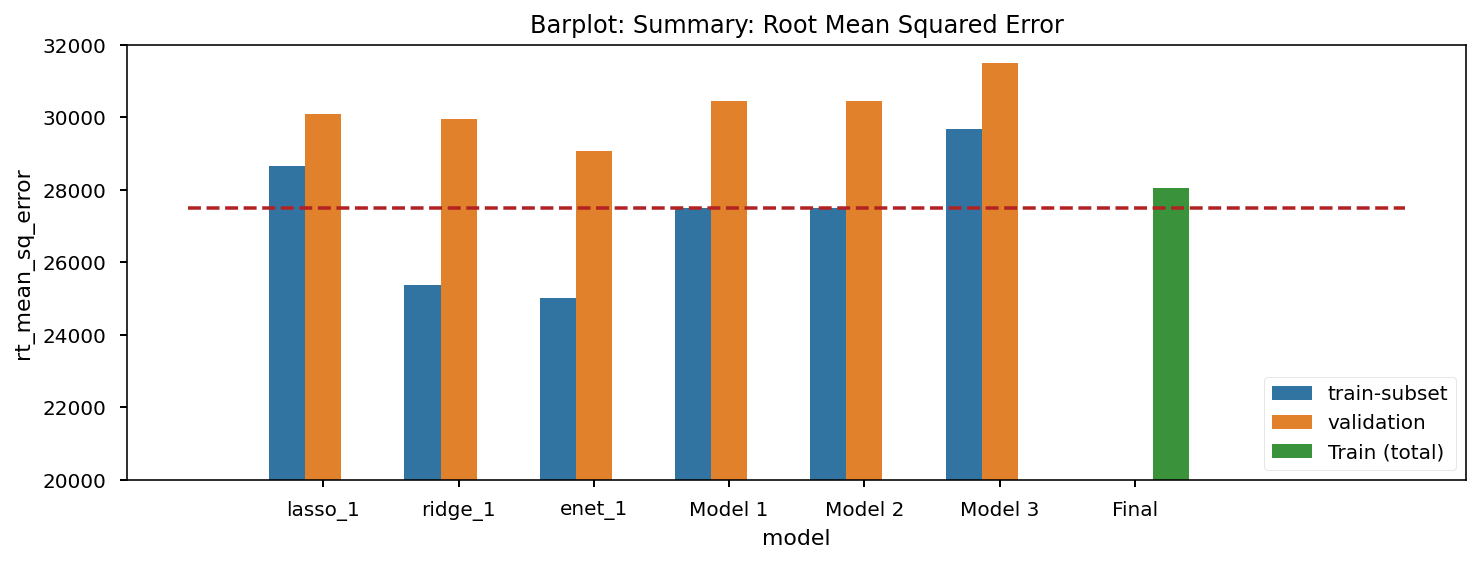

In [104]:
plot_bar('Summary: Root Mean Squared Error', summary_for_plot, 
         x='model', y='rt_mean_sq_error', figsize = (12,4), hue='dataset',
         legend='lower right',ymin=20000, ymax=32000, 
         hlines_y=(summary_for_plot.iloc[6,3]), xmax=8, hlines_label = 'Rt Mean Sq Error: 27,492')

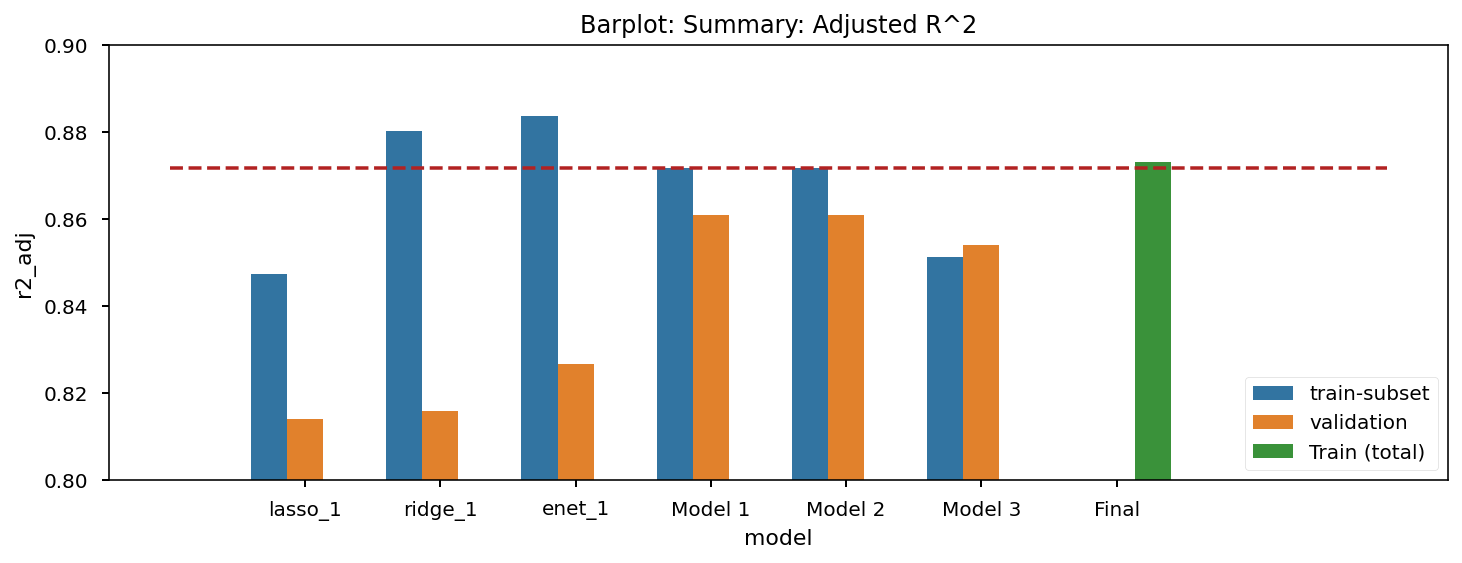

In [105]:
plot_bar('Summary: Adjusted R^2', summary_for_plot, 
         x='model', y='r2_adj', figsize = (12,4), hue='dataset',
         legend='lower right',ymin=0.8, ymax=0.9, 
         hlines_y=(summary_for_plot.iloc[6,6]), xmax=8, hlines_label = 'Adj R2: 0.8715')

## 4. Kaggle Submissions:

### <span style="color:forestgreen">Model 1 (34 features)</span>

In [106]:
X1_test = test[remod1_features]
X1_test_scaled = ss1.transform(X1_test)
y1_test = mod1.predict(X1_test_scaled)

test['saleprice'] = y1_test
mod1_submit = test[['id','saleprice']]

mod1_submit.to_csv('datasets/model_1.csv',index=False)

### <span style="color:forestgreen">Model 2 (26 features)</span>

In [107]:
X2_test = test[remod2_features]
X2_test_scaled = ss2.transform(X2_test)
y2_test = mod2.predict(X2_test_scaled)

test['saleprice'] = y2_test
mod1_submit = test[['id','saleprice']]

mod1_submit.to_csv('datasets/model_2.csv',index=False)

### <span style="color:forestgreen">Model 3 (22 features)</span>

In [108]:
X3_test = test[remod3_features]
X3_test_scaled = ss3.transform(X3_test)
y3_test = mod3.predict(X3_test_scaled)

test['saleprice'] = y3_test
mod1_submit = test[['id','saleprice']]

mod1_submit.to_csv('datasets/model_3.csv',index=False)

### <span style="color:forestgreen">Model 4 (total train dataset + 34 features from model 1)</span>

In [109]:
X4_test = test[remod1_features]
X4_test_scaled = ss_final.transform(X4_test)
y4_test = mod_final.predict(X4_test_scaled)

test['saleprice'] = y4_test
mod4_submit = test[['id','saleprice']]

mod4_submit.to_csv('datasets/model_4.csv',index=False)


![title](images/kaggle_submissions.png)

## 5. Conclusions:

Based on the problem statement, we have identified the regression model that can predict `'saleprice'` of a house in Ames Iowa.  The model is based on 34 the following features. 
For example:
 - Neighborhoods **Northridge Heights** and **Stone Brook** have high value to sale price.
 - Quality of the house (Overall, Exterior, Kitchen) drives sale.

![title](images/lasso_coefficient.png)

**MODEL 1** is the selected model.

**Key Steps involved to identify the model:**
- Data Cleaning and EDA (including mapping/encoding of categorical values) 
- Train-Validation Split and Cross Validation (5-folds) was used to ensure the model performs well on unseen data.
- Data was scaled to elminate effect of different scales in numerical values (i.e. sqft vs. rooms)
- Lasso regularization helped reduce the variance in the model, as well as feature selection.


**Results**

- Performs well on both train & validation data
  - **Model 1 Training Date**  ![title](images/mod_1_train.png)
  - **Model 1 Validation Data** ![title](images/mod_1_val.png)

- Low Error (Root Mean-Squared Error)
  - **Model 1** has the best bias-variance trade-off.  Although Rigde & ElasticNet has lower error in training, but higher in validation
  ![title](images/bar_rmse_all.png)
  
- High Accuracy (Adjusted R-square)
  - **Model 1** has the best bias-variance trade-off.  Although Rigde & ElasticNet has higher R2 in training, but lower in validation
  ![title](images/bar_r2_all.png)
  
**Next Steps:** Based on the remaining 34 features, we can draw some inferences to this model (i.e. Neighborhoods), however this may not be helpful for home improvement projects.  For example, if a homeowner or architect would like to understand what kind of renovations (i.e. material selection) would help drive the sale price of a house, further analysis is needed.